# 1. Load the Data

In this section, we load the student scores dataset into a pandas DataFrame.


In [14]:
import pandas as pd

df = pd.read_csv("student_scores.csv")
df.head()


,Hours,Scores,Gender
0,2.5,21,F
1,NaN,47,M
2,3.2,27,M
3,8.5,75,M
4,3.5,30,M


# 2. Explore the Data Structure

We examine the structure of the dataset, check for missing values, 
and identify numerical and categorical attributes.


In [15]:
df.info()
print(df.isnull().sum())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   23 non-null     float64
 1   Scores  25 non-null     int64  
 2   Gender  25 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 728.0+ bytes
Hours     2
Scores    0
Gender    0
dtype: int64


,Hours,Scores
count,23.000000,25.000000
mean,4.891304,51.480000
std,2.571330,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.500000,47.000000
75%,7.150000,75.000000
max,9.200000,95.000000


# 3. Create Training and Test Set

We split the dataset before preprocessing to prevent data leakage.


In [16]:
from sklearn.model_selection import train_test_split

X = df.drop("Scores", axis=1)
y = df["Scores"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 4. Data Visualization


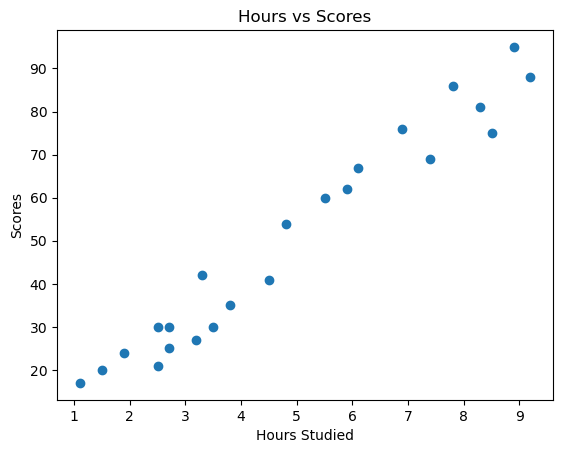

In [17]:
import matplotlib.pyplot as plt

plt.scatter(df["Hours"], df["Scores"])
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.title("Hours vs Scores")
plt.show()


# 4. Create the Full Pipeline

The pipeline includes:
- Handling missing values (numeric)
- Feature scaling
- One-hot encoding (categorical)
- Linear Regression model

This ensures all preprocessing and modeling steps are automated and applied consistently.


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression


In [19]:
num_attribs = ["Hours"]
cat_attribs = ["Gender"]

In [20]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

In [21]:
cat_pipeline = Pipeline([
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

In [22]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, ["Hours"]),
    ("cat", cat_pipeline, ["Gender"]),
])

In [23]:
model_pipeline = Pipeline([
    ("preprocessing", full_pipeline),
    ("regressor", LinearRegression())
])

# 5. Train the Model

We fit the pipeline on the training data.

In [24]:
model_pipeline.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# 6. Evaluate the Model

We evaluate the model using Root Mean Squared Error (RMSE).

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

pred = model_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
rmse, mae, r2


(np.float64(7.0869331099280855), 6.17589356121793, 0.9146420446896755)